In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy

In [2]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/test.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')

df

,Station,Connection,Time,Name
0,0,1,10,A
1,1,3,10,B
2,1,2,10,B
3,2,7,10,C
4,2,6,10,C
5,2,4,10,C
6,2,1,10,C
7,3,9,10,D
8,3,4,10,D
9,3,1,10,D


In [3]:
MG = nx.MultiGraph()

In [4]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [5]:
MG

In [6]:
print(MG.adj)

{0: {1: {0: {'weight': 10}}}, 1: {0: {0: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 2: {0: {'weight': 10}, 1: {'weight': 10}}}, 3: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 9: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 2: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 7: {0: {'weight': 10}, 1: {'weight': 10}}, 6: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 7: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 8: {0: {'weight': 10}, 1: {'weight': 10}}}, 6: {2: {0: {'weight': 10}, 1: {'weight': 10}}}, 4: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 5: {0: {'weight': 10}, 1: {'weight': 10}}}, 9: {3: {0: {'weight': 10}, 1: {'weight': 10}}}, 5: {4: {0: {'weight': 10}, 1: {'weight': 10}}}, 8: {7: {0: {'weight': 10}, 1: {'weight': 10}}}}


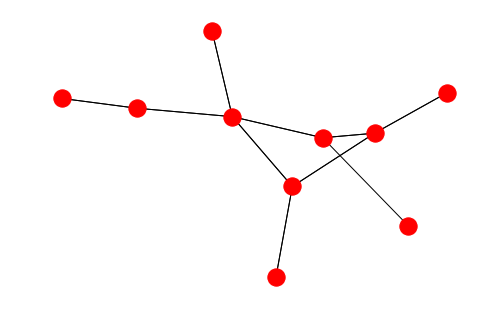

In [7]:
nx.draw(MG, label=True)
plt.show()

In [8]:
shortestMulti = nx.johnson(MG)
print(shortestMulti)
print(shortestMulti[1][5])
print(shortestMulti[1][5][1])

{0: {0: [0], 1: [0, 1], 3: [0, 1, 3], 2: [0, 1, 2], 9: [0, 1, 3, 9], 4: [0, 1, 3, 4], 7: [0, 1, 2, 7], 6: [0, 1, 2, 6], 5: [0, 1, 3, 4, 5], 8: [0, 1, 2, 7, 8]}, 1: {1: [1], 0: [1, 0], 3: [1, 3], 2: [1, 2], 9: [1, 3, 9], 4: [1, 3, 4], 7: [1, 2, 7], 6: [1, 2, 6], 5: [1, 3, 4, 5], 8: [1, 2, 7, 8]}, 3: {3: [3], 1: [3, 1], 9: [3, 9], 4: [3, 4], 0: [3, 1, 0], 2: [3, 1, 2], 5: [3, 4, 5], 7: [3, 1, 2, 7], 6: [3, 1, 2, 6], 8: [3, 1, 2, 7, 8]}, 2: {2: [2], 1: [2, 1], 7: [2, 7], 6: [2, 6], 4: [2, 4], 0: [2, 1, 0], 3: [2, 1, 3], 8: [2, 7, 8], 5: [2, 4, 5], 9: [2, 1, 3, 9]}, 7: {7: [7], 2: [7, 2], 8: [7, 8], 1: [7, 2, 1], 6: [7, 2, 6], 4: [7, 2, 4], 0: [7, 2, 1, 0], 3: [7, 2, 1, 3], 5: [7, 2, 4, 5], 9: [7, 2, 1, 3, 9]}, 6: {6: [6], 2: [6, 2], 1: [6, 2, 1], 7: [6, 2, 7], 4: [6, 2, 4], 0: [6, 2, 1, 0], 3: [6, 2, 1, 3], 8: [6, 2, 7, 8], 5: [6, 2, 4, 5], 9: [6, 2, 1, 3, 9]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 5: [4, 5], 1: [4, 2, 1], 7: [4, 2, 7], 6: [4, 2, 6], 9: [4, 3, 9], 0: [4, 2, 1, 0], 8: [4, 2, 7

In [73]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes
        random.shuffle(self.nodes)       
        
    
    def shuffleGenes(self):
        print("Before :", self.nodes)
        random.shuffle(self.nodes)
        print("After :", self.nodes) 
        
        
    #Order Changing Mutation, 1 is selected thanks to Pm probability then exhanged with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        print(Pm)
        for i in self.nodes:
            self.randMutate = random.random()
            print("rand = ", self.randMutate)
            print("node = ",i)
            if self.randMutate < self.Pm:
                self.a = random.randint(0,len(self.nodes)-1)
                print('self.a = ', self.a)
                print("Warning mutation, before = ", i)
                self.nodes[[i, self.a]] = self.nodes[[self.a, i]]
                print("Modified to = ", self.a)
                print(self.nodes)
                
    
    def fitnessScore(self):
        return 0

    def pathWay(self):
        return 0
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes    

In [76]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d gene)
def crossoverPermutation(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = chromo1.nodes[0:lenChromo]
    print(chromo1.nodes)
    print(chromo2.nodes)
    print(childrenChr)
    for i in chromo2.nodes:
        print(i)
        if i not in childrenChr:
            childrenChr = np.append(childrenChr, [i])
    print(childrenChr)
    return childrenChr
    

In [11]:
def populationGeneration(popsize, nodeList):
    population = []
    for i in range(0,popsize,1):
        population = population + [Chromosome(nodeList.unique())]
    return population

In [12]:
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
def merge(a, b):
    c = a[:-1] + b[:]
    return c
    

In [79]:
population = populationGeneration(3, df.Station)
population

[Chromosome :|8|0|3|9|6|4|7|2|5|1|,
 Chromosome :|3|9|5|4|7|2|8|1|6|0|,
 Chromosome :|4|3|0|1|9|6|5|2|8|7|]

In [75]:
population[1].mutationGene(0.3)

0.3
rand =  0.6971272831903937
node =  5
rand =  0.773227592071395
node =  4
rand =  0.8905275622310547
node =  6
rand =  0.9902371443342229
node =  0
rand =  0.47172662618962913
node =  7
rand =  0.7411902901245878
node =  1
rand =  0.074279633257471
node =  9
self.a =  1
Warning mutation, before =  9
Modified to =  1
[5 3 6 0 7 1 9 8 2 4]
rand =  0.04139637998233736
node =  8
self.a =  0
Warning mutation, before =  8
Modified to =  0
[2 3 6 0 7 1 9 8 5 4]
rand =  0.16587902451723224
node =  5
self.a =  1
Warning mutation, before =  5
Modified to =  1
[2 1 6 0 7 3 9 8 5 4]
rand =  0.8317056380789071
node =  4


In [ ]:
population

In [ ]:
len(shortestMulti)

In [ ]:
a = Chromosome(df.Station.unique())

In [ ]:
print(a)

In [ ]:
a.shuffleGenes()

In [ ]:
a.mutationGene(0.1)

In [ ]:
population

In [ ]:
population[1]

In [ ]:
population[1].shuffleGenes()

In [ ]:
random.random()

In [ ]:
a = [1,2,3]
b = [3,5]

In [ ]:
c = [x for x in a if x not in b]

In [ ]:
a[:-1]

In [ ]:
merge(a,b)

In [ ]:
population[1]

In [80]:
Chromosome(crossoverPermutation(population[1], population[2]))

[3 9 5 4 7 2 8 1 6 0]
[4 3 0 1 9 6 5 2 8 7]
[3 9 5 4 7]
4
3
0
1
9
6
5
2
8
7
[3 9 5 4 7 0 1 6 2 8]


Chromosome :|1|8|7|0|2|6|3|4|5|9|

In [44]:
zz = Chromosome([1,2,3])

In [ ]:
crossover(zz,population[2])

In [ ]:
for i in range(0, 10):
    print(random.randint(0,3))

In [ ]:
l = np.array([1,2,3])
print(l)


In [29]:
a = [10, 20, 30, 40, 50, 60]


In [30]:
a[0:3]

[10, 20, 30]